<a href="https://colab.research.google.com/github/fadhilramadhan25/Cohort-analysis-fitlife/blob/main/Cohort_Analysis_Fitlife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import files
files.upload()

Saving FitLifeCohortAnalysis 2.csv to FitLifeCohortAnalysis 2.csv


{'FitLifeCohortAnalysis 2.csv': b'User_ID,Signup_Month,Workout_Videos,Meal_Plan,Activity_Tracking,Revenue,Membership_Type,Acquisition_Source,Month_1_Retention,Month_2_Retention,Month_3_Retention\n1001,Jul-2024,4,61,90,500000,Premium,Organic Search,1,0,0\n1002,Apr-2024,75,24,37,1000000,Premium,Referral,1,1,0\n1003,Nov-2024,62,20,88,600000,Basic,Referral,1,1,0\n1004,Aug-2024,62,37,49,900000,Basic,Referral,1,1,1\n1005,May-2024,24,4,19,600000,Executive,Influencer Marketing,0,0,0\n1006,Jul-2024,55,92,89,300000,Basic,Social Media Ads,0,0,0\n1007,Oct-2024,9,20,85,300000,Basic,Referral,1,0,0\n1008,Mar-2024,3,60,12,300000,Basic,Referral,1,0,0\n1009,Jul-2024,31,24,61,1000000,Premium,Referral,1,1,0\n1010,Nov-2024,40,50,41,500000,Premium,Social Media Ads,0,0,0\n1011,Nov-2024,36,49,33,600000,Executive,Social Media Ads,1,0,0\n1012,Aug-2024,24,51,50,1200000,Executive,Referral,1,1,0\n1013,May-2024,6,36,68,1200000,Executive,Referral,1,1,0\n1014,Apr-2024,66,66,71,500000,Premium,Organic Search,1,0,0\n101

In [5]:
df = pd.read_csv('/content/FitLifeCohortAnalysis 2.csv')
df.head()

,User_ID,Signup_Month,Workout_Videos,Meal_Plan,Activity_Tracking,Revenue,Membership_Type,Acquisition_Source,Month_1_Retention,Month_2_Retention,Month_3_Retention
0,1001,Jul-2024,4,61,90,500000,Premium,Organic Search,1,0,0
1,1002,Apr-2024,75,24,37,1000000,Premium,Referral,1,1,0
2,1003,Nov-2024,62,20,88,600000,Basic,Referral,1,1,0
3,1004,Aug-2024,62,37,49,900000,Basic,Referral,1,1,1
4,1005,May-2024,24,4,19,600000,Executive,Influencer Marketing,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             1000 non-null   int64 
 1   Signup_Month        1000 non-null   object
 2   Workout_Videos      1000 non-null   int64 
 3   Meal_Plan           1000 non-null   int64 
 4   Activity_Tracking   1000 non-null   int64 
 5   Revenue             1000 non-null   int64 
 6   Membership_Type     1000 non-null   object
 7   Acquisition_Source  1000 non-null   object
 8   Month_1_Retention   1000 non-null   int64 
 9   Month_2_Retention   1000 non-null   int64 
 10  Month_3_Retention   1000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


**Key Question**

1. bagaimana pola retensi berbeda antar cohort pengguna

In [8]:
# convert Signup_Month to datetime format for proper cohort grouping
df['Signup_Month'] = pd.to_datetime(df['Signup_Month'], format = '%b-%Y')

# extract cohort (year - month) for grouping
df['Cohort'] = df['Signup_Month'].dt.to_period('M')

# group by cohort and calculate retention rates
cohort_data = df.groupby('Cohort').agg({
    'User_ID': 'count', # Total user per cohort
    'Month_1_Retention': 'sum',
    'Month_2_Retention': 'sum',
    'Month_3_Retention': 'sum'
}).reset_index()

# Calculate retention percentages
cohort_data['Month_1_Retention_Rate'] = (cohort_data['Month_1_Retention'] / cohort_data['User_ID']) * 100
cohort_data['Month_2_Retention_Rate'] = (cohort_data['Month_2_Retention'] / cohort_data['User_ID']) * 100
cohort_data['Month_3_Retention_Rate'] = (cohort_data['Month_3_Retention'] / cohort_data['User_ID']) * 100

# Select relevant columns
cohort_retention = cohort_data[['Cohort', 'User_ID', 'Month_1_Retention_Rate', 'Month_2_Retention_Rate', 'Month_3_Retention_Rate']]

# Display cohort retention analysis
# Instead of using the unavailable ace_tools, use pandas' display function
display(cohort_retention)
# or print the first few rows for a quick view
print(cohort_retention.head())

,Cohort,User_ID,Month_1_Retention_Rate,Month_2_Retention_Rate,Month_3_Retention_Rate
0,2024-01,101,75.247525,42.574257,22.772277
1,2024-02,71,70.422535,45.070423,22.535211
2,2024-03,92,61.956522,38.043478,18.478261
3,2024-04,74,66.216216,45.945946,21.621622
4,2024-05,91,69.230769,36.263736,15.384615
5,2024-06,77,63.636364,38.961039,15.584416
6,2024-07,82,81.707317,53.658537,29.268293
7,2024-08,77,75.324675,33.766234,16.883117
8,2024-09,80,62.500000,36.250000,18.750000
9,2024-10,93,67.741935,38.709677,18.279570


    Cohort  User_ID  Month_1_Retention_Rate  Month_2_Retention_Rate  \
0  2024-01      101               75.247525               42.574257   
1  2024-02       71               70.422535               45.070423   
2  2024-03       92               61.956522               38.043478   
3  2024-04       74               66.216216               45.945946   
4  2024-05       91               69.230769               36.263736   

   Month_3_Retention_Rate  
0               22.772277  
1               22.535211  
2               18.478261  
3               21.621622  
4               15.384615  


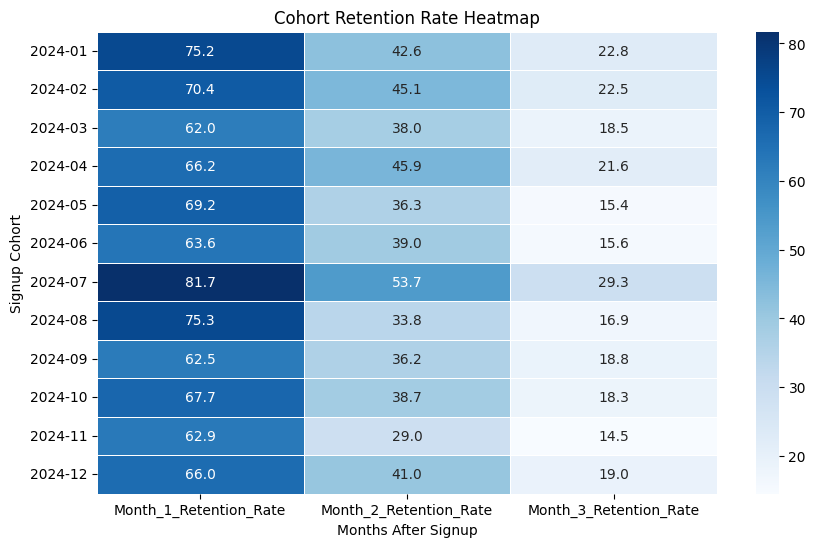

In [9]:
# Prepare data for heatmap in the format shown in Study Case file
cohort_heatmap_data = cohort_retention.set_index("Cohort")[["Month_1_Retention_Rate", "Month_2_Retention_Rate", "Month_3_Retention_Rate"]]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_heatmap_data, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

plt.title("Cohort Retention Rate Heatmap")
plt.xlabel("Months After Signup")
plt.ylabel("Signup Cohort")
plt.savefig("cohort_retention_heatmap.png")
plt.show()

**Interpretasi Heatmap**

1. Setiap baris mewakili cohort pengguna berdasarkan bulan pendaftaran.
2. Setiap kolom mewakili bulan setelah pendaftaran (Bulan 1, Bulan 2, Bulan 3).
3. Warna biru yang lebih gelap menunjukkan retensi yang lebih tinggi, sementara warna lebih terang menunjukkan penurunan retensi.
4. Dari heatmap ini, Anda dapat melihat bahwa retensi pengguna menurun dari waktu ke waktu, dengan sebagian cohort memiliki retensi lebih baik dibanding cohort lainnya.

**1. Cohort Juli 2024 Memiliki Retensi Tertinggi di Semua Bulan**

* Fakta: Cohort pengguna yang bergabung pada Juli 2024 memiliki tingkat retensi terbaik dibanding cohort lainnya di bulan 1, 2, dan 3.

Mengapa ini penting?

* Strategi onboarding, pemasaran, atau pengalaman pengguna pada bulan ini lebih efektif dibanding bulan lainnya.
* Bisa jadi ada fitur baru atau promo khusus yang menarik pengguna untuk tetap aktif.
* Ini bisa dijadikan benchmark untuk meningkatkan retensi di cohort-cohort berikutnya.

**2. Retensi Menurun Signifikan Setelah Bulan 1 ke Bulan 2 di Semua Cohort**

* Tren Umum: Setelah bulan pertama, retensi pengguna turun tajam di semua cohort.
* Contoh: Cohort Januari 2024 turun dari 75.25% ke 42.57% di bulan kedua, dan terus turun ke 22.77% di bulan ketiga.
* Ini menunjukkan bahwa pengguna cenderung berhenti setelah bulan pertama, kemungkinan karena kurangnya engagement atau nilai tambah dari aplikasi setelah fase awal.

**3. Cohort Mei 2024 Memiliki Retensi Bulan Ke-3 Terendah**

* Fakta: Cohort yang mendaftar pada Mei 2024 memiliki tingkat retensi bulan ke-3 paling rendah (15.38%), jauh lebih rendah dibanding cohort lainnya.

Mengapa ini bisa terjadi?

* Bisa jadi ada perubahan strategi pemasaran yang membawa pengguna yang kurang engaged.
* Mungkin onboarding atau pengalaman pengguna pada bulan ini tidak optimal.
* Bisa juga karena ada faktor eksternal, seperti perubahan harga, kompetitor, atau tren musiman.

---
**2. Kapan pengguna cenderung berhenti menggunakan aplikasi?**

In [17]:
# Menghitung rata-rata retensi untuk setiap bulan setelah pendaftaran
average_retention = cohort_retention[['Month_1_Retention_Rate', 'Month_2_Retention_Rate', 'Month_3_Retention_Rate']].mean()

# Menentukan kapan pengguna cenderung berhenti berdasarkan tren retensi
drop_off_month = average_retention.idxmin()

# Menampilkan hasil
average_retention, drop_off_month


(Month_1_Retention_Rate    68.573924
 Month_2_Retention_Rate    39.939632
 Month_3_Retention_Rate    19.422793
 dtype: float64,
 'Month_3_Retention_Rate')

Berdasarkan analisis data, rata-rata tingkat retensi pengguna adalah sebagai berikut:

* Bulan 1 Retention Rate: 68.57% pengguna masih aktif.
* Bulan 2 Retention Rate: 39.94% pengguna masih aktif.
* Bulan 3 Retention Rate: 19.42% pengguna masih aktif.

Kapan pengguna cenderung berhenti menggunakan aplikasi?
* Pengguna paling banyak berhenti menggunakan aplikasi pada bulan ke-3 setelah pendaftaran. Ini terlihat dari penurunan retensi yang tajam dari 39.94% (Bulan 2) menjadi 19.42% (Bulan 3).

Apa artinya ini bagi FitLife?

1. Sebagian besar pengguna masih tertarik dan aktif pada bulan pertama.
2. Penurunan besar terjadi setelah bulan pertama, tetapi penurunan drastis terjadi antara Bulan 2 dan Bulan 3.
3. Ini menunjukkan bahwa pengguna mungkin kehilangan minat setelah dua bulan menggunakan aplikasi, atau mereka tidak menemukan nilai jangka panjang dalam layanan FitLife.

**3. Bagaimana retention untuk setiap pengguna berdasarkan setiap sumber akuisisinya?**

In [7]:
# Menghitung rata-rata retensi berdasarkan sumber akuisisi pengguna
acquisition_retention = df.groupby('Acquisition_Source')[['Month_1_Retention', 'Month_2_Retention', 'Month_3_Retention']].mean() * 100

def display_dataframe_to_user(name, dataframe):
  """Displays a pandas DataFrame with a title.

  Args:
      name: The title to display above the DataFrame.
      dataframe: The pandas DataFrame to display.
  """
  print(name)
  display(dataframe)

# Menampilkan hasil dalam bentuk tabel
display_dataframe_to_user(name="Retention by Acquisition Source", dataframe=acquisition_retention)

Retention by Acquisition Source


,Month_1_Retention,Month_2_Retention,Month_3_Retention
Acquisition_Source,,,
Influencer Marketing,64.575646,38.376384,19.557196
Organic Search,69.583333,39.583333,17.916667
Referral,67.489712,40.740741,21.399177
Social Media Ads,73.577236,41.869919,19.105691


<Figure size 1000x600 with 0 Axes>

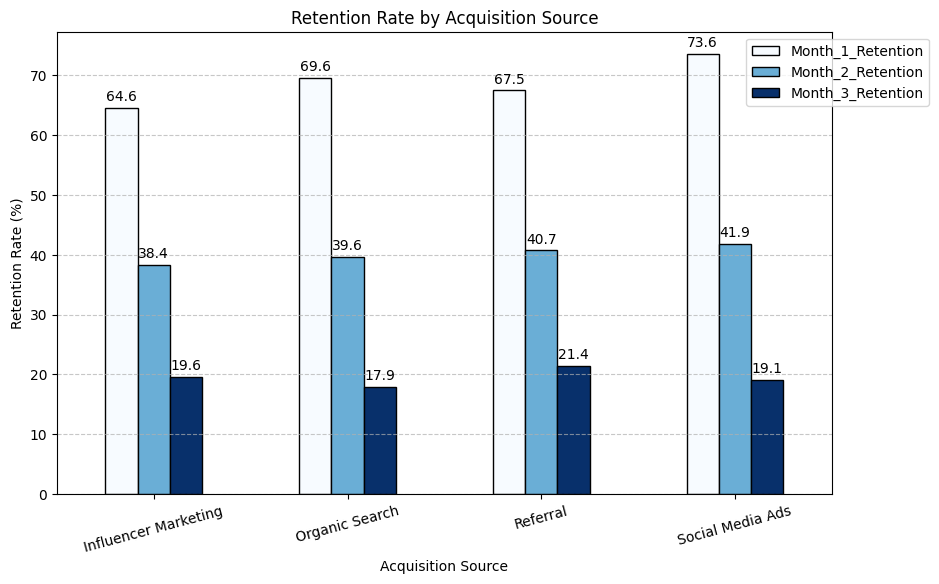

In [32]:
# Plot Bar Chart for Retention by Acquisition Source with value labels
plt.figure(figsize=(10, 6))
ax = acquisition_retention.plot(kind='bar', figsize=(10, 6), colormap="Blues", edgecolor="black")

plt.xlabel("Acquisition Source")
plt.ylabel("Retention Rate (%)")
plt.title("Retention Rate by Acquisition Source")
plt.xticks(rotation=15)
plt.legend(title="Months After Signup", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, padding=3)

angle = np.deg2rad(40.5)
ax.legend(loc="lower left",
          bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.savefig("retention_by_acquisition_source.png")
plt.show()

**Beberapa insight utama dari data ini:**

**1. Sumber akuisisi dengan retensi bulan pertama tertinggi → Social Media Ads (73.58%)**

* Ini menunjukkan bahwa pengguna yang datang dari iklan media sosial lebih mungkin untuk tetap menggunakan aplikasi di bulan pertama.

**2. Retensi bulan kedua dan ketiga cukup konsisten di semua sumber akuisisi, dengan Referral memiliki retensi terbaik di bulan ke-3 (21.40%).**

* Pengguna yang datang melalui referral cenderung bertahan lebih lama dibandingkan yang datang dari Influencer Marketing atau Organic Search.
* Ini masuk akal karena pengguna referral biasanya lebih termotivasi untuk menggunakan aplikasi karena mendapat rekomendasi dari teman atau orang yang mereka percaya.

**3. Influencer Marketing memiliki retensi bulan ke-3 yang lebih rendah dibandingkan Referral dan Social Media Ads (19.56%).**

* Kemungkinan pengguna yang datang dari influencer tertarik hanya karena promosi awal tetapi tidak cukup engaged untuk tetap menggunakan aplikasi dalam jangka panjang.

---
**4. Apakah pengguna Executive lebih loyal dibanding pengguna Basic?**

In [11]:
# Menghitung rata-rata retensi berdasarkan jenis membership
membership_retention = df.groupby('Membership_Type')[['Month_1_Retention', 'Month_2_Retention', 'Month_3_Retention']].mean() * 100

# Menampilkan hasil dalam bentuk tabel
# Removed 'tools.' to directly call the function defined earlier
display_dataframe_to_user(name="Retention by Membership Type", dataframe=membership_retention)

Retention by Membership Type


,Month_1_Retention,Month_2_Retention,Month_3_Retention
Membership_Type,,,
Basic,70.149254,40.597015,19.104478
Executive,67.492260,39.009288,19.814241
Premium,68.421053,40.643275,19.590643


<Figure size 1000x600 with 0 Axes>

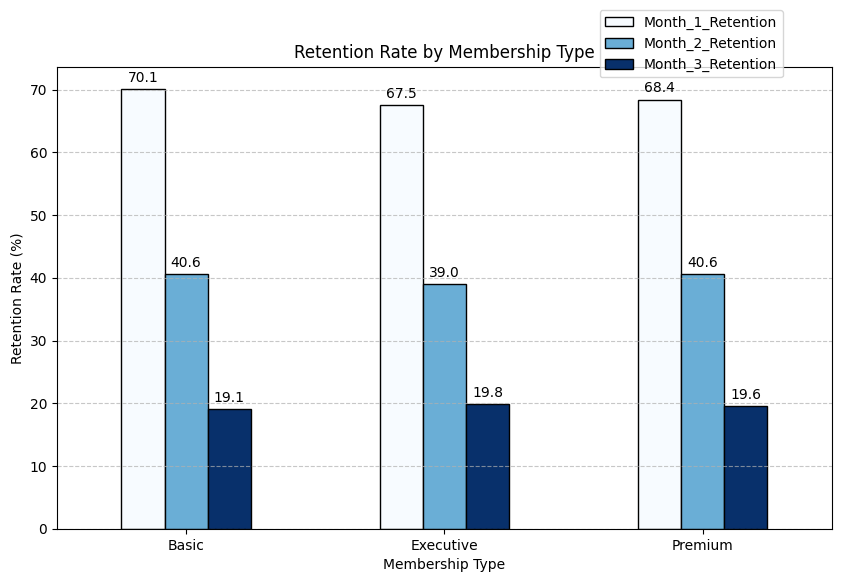

In [25]:
# Plot Retention by Membership Type
plt.figure(figsize=(10, 6))
membership_retention.plot(kind='bar', figsize=(10, 6), colormap="Blues", edgecolor="black")

plt.xlabel("Membership Type")
plt.ylabel("Retention Rate (%)")
plt.title("Retention Rate by Membership Type")
plt.xticks(rotation=0)
plt.legend(title="Months After Signup", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, padding=3)

angle = np.deg2rad(67.5)
ax.legend(loc="lower left",
          bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("retention_by_membership_type.png")
plt.show()

**Insight Utama**

1. Pengguna Basic memiliki retensi bulan pertama tertinggi (70.15%), dibandingkan Executive (67.49%) dan Premium (68.42%).
2. Pengguna Executive memiliki retensi bulan ke-3 yang sedikit lebih tinggi (19.81%) dibanding pengguna Basic (19.10%) dan Premium (19.59%).
3. Secara umum, tidak ada perbedaan signifikan antara ketiga jenis membership dalam retensi jangka panjang.

**Kesimpulan**

1. Pengguna Executive sedikit lebih loyal dalam jangka panjang (Bulan 3) dibanding pengguna Basic dan Premium.
2. Namun, perbedaannya kecil, yang berarti jenis membership bukan satu-satunya faktor utama dalam retensi pengguna.
3. Strategi retensi harus lebih difokuskan pada engagement dan pengalaman onboarding, karena tingkat penurunan retensi mirip di semua kategori membership.

---
**5. Apakah pengguna yang sering menggunakan fitur lebih cenderung loyal?**

In [13]:
# Menghitung rata-rata penggunaan fitur untuk pengguna yang bertahan hingga bulan ke-3 (loyal) dan yang tidak bertahan
loyal_users = df[df['Month_3_Retention'] == 1]
churned_users = df[df['Month_3_Retention'] == 0]

# Menghitung rata-rata penggunaan fitur untuk loyal vs churned users
feature_usage_loyal = loyal_users[['Workout_Videos', 'Meal_Plan', 'Activity_Tracking']].mean()
feature_usage_churned = churned_users[['Workout_Videos', 'Meal_Plan', 'Activity_Tracking']].mean()

# Gabungkan hasil ke dalam satu dataframe untuk perbandingan
feature_usage_comparison = pd.DataFrame({
    'Loyal Users (Retained Month 3)': feature_usage_loyal,
    'Churned Users (Did Not Retain Month 3)': feature_usage_churned
})

# Menampilkan hasil dalam bentuk tabel
# Removed 'tools.' to directly call the display_dataframe_to_user function
display_dataframe_to_user(name="Feature Usage - Loyal vs Churned Users", dataframe=feature_usage_comparison)

Feature Usage - Loyal vs Churned Users


,Loyal Users (Retained Month 3),Churned Users (Did Not Retain Month 3)
Workout_Videos,44.948718,46.447205
Meal_Plan,48.548718,44.522981
Activity_Tracking,46.174359,46.084472


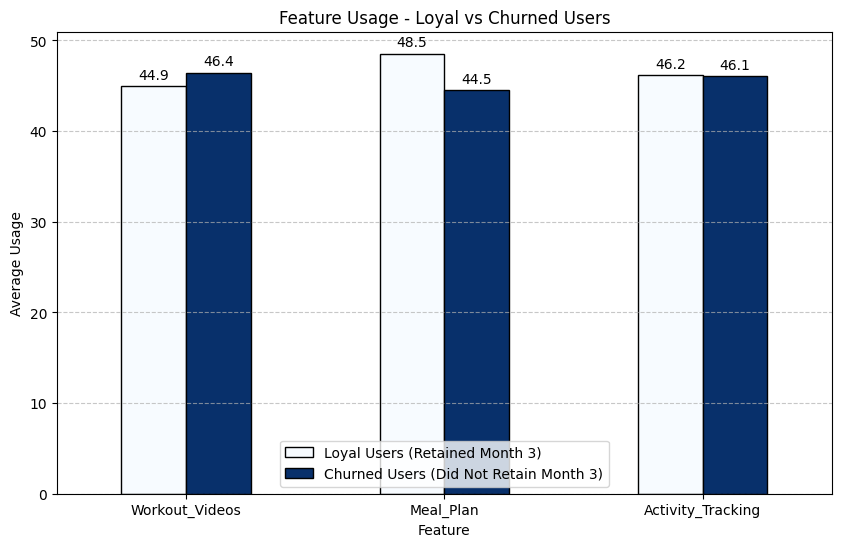

In [22]:
# Plot Feature Usage Comparison for Loyal vs Churned Users
feature_usage_comparison.plot(kind='bar', figsize=(10, 6), colormap="Blues", edgecolor="black")

plt.xlabel("Feature")
plt.ylabel("Average Usage")
plt.title("Feature Usage - Loyal vs Churned Users")
plt.xticks(rotation=0)
angle = np.deg2rad(67.5)
ax.legend(loc="lower left",
          bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, padding=3)

plt.savefig("feature_usage_comparison.png")
plt.show()

**Insight Utama**

**1. Pengguna yang lebih sering menggunakan fitur "Meal Plan" lebih cenderung loyal**

* Pengguna yang tetap bertahan hingga bulan ke-3 menggunakan fitur ini rata-rata 48.55 kali, dibandingkan dengan 44.52 kali pada pengguna yang churn.
* Ini menunjukkan bahwa penggunaan Meal Plan berkontribusi pada retensi pengguna.

**2. Penggunaan "Workout Videos" dan "Activity Tracking" relatif sama antara loyal dan churned users**

* Workout Videos → Loyal: 44.95 | Churned: 46.45
* Activity Tracking → Loyal: 46.17 | Churned: 46.08
Artinya, Workout Videos dan Activity Tracking bukan faktor utama yang membedakan pengguna loyal dan churned.

---

**Kesimpulan Utama**

1. Retensi bulan pertama cukup baik, tetapi banyak pengguna churn setelah bulan kedua.
2. Cohort Juli memiliki retensi terbaik, sehingga strategi onboarding pada bulan ini bisa dijadikan contoh sukses.
3. Referral adalah sumber akuisisi terbaik untuk retensi jangka panjang, sedangkan Social Media Ads memberikan retensi bulan pertama tertinggi.
4. Jenis membership tidak terlalu berpengaruh pada retensi, tetapi pengguna Executive memiliki sedikit keunggulan dalam retensi jangka panjang.
5. Penggunaan "Meal Plan" berkontribusi pada loyalitas pengguna, sehingga harus lebih dipromosikan sejak onboarding.